In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#### create Vader scores as features

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
sentObj = SentimentIntensityAnalyzer()  

In [ ]:
loseit2['vader'] = loseit2['body'].apply(lambda x: sentObj.polarity_scores(x))
loseit2 = pd.concat([loseit2.drop(['vader'], axis=1), loseit2['vader'].apply(pd.Series)], axis=1)

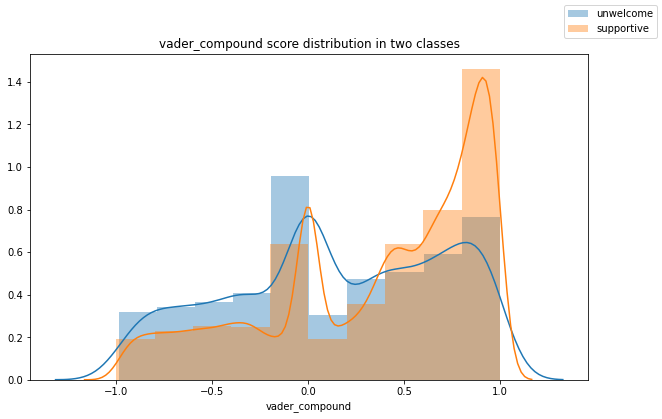

In [ ]:
fig = plt.figure(figsize=(10,6))

sns.distplot(loseit2[loseit2['score']<=0]['compound'],bins=10,hist=True,axlabel='vader_compound')
sns.distplot(loseit2[loseit2['score']>=1]['compound'],bins=10,hist=True,axlabel='vader_compound')
fig.legend(labels=['unwelcome','supportive'])
plt.title('vader_compound score distribution in two classes')
plt.show()

In [ ]:
body2=loseit2['body'].to_list()
body2[0]

'Dont be afraid of becoming fat again remember that you can do exactly what you did  to get where you are now. Again. All you need is willpower.'

In [ ]:
### create Doc2Vec features

In [ ]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
def clean_data(data):
  clean_dt=[]
  for i in data:
    line=re.sub(r'[^a-zA-Z0-9\s]', ' ',i)
    line=word_tokenize(line)
    token=[word.lower() for word in line if word not in stopwords.words('english')]
    clean_dt.append(token)
  return clean_dt


In [ ]:
loseit_token=clean_data(body2)

In [ ]:
documents_loseit = [TaggedDocument(doc, [i]) for i, doc in enumerate(loseit_token)]
dm_model_loseit=Doc2Vec(documents_loseit,vector_size=100, min_count=2, epochs=20)
dbom_model_loseit=Doc2Vec(documents_loseit,vector_size=100, min_count=2, epochs=20,dm=0)

In [ ]:
dm_vec=[]
for i in range(len(loseit_token)):
    dm_vec.append(dm_model_loseit.docvecs[i])


In [ ]:
dm_colname=[]
for i in list(range(100)):
  colname='dm'+'-'+str(i)
  dm_colname.append(colname)

In [ ]:
dm_frame=pd.DataFrame(dm_vec)
dm_frame.columns=dm_colname

In [ ]:
dbom_vec=[]
for i in range(len(loseit_token)):
    dbom_vec.append(dbom_model_loseit.docvecs[i])

In [ ]:
dbom_colname=[]
for i in list(range(100)):
  colname='dbom'+'-'+str(i)
  dbom_colname.append(colname)

In [ ]:
dbom_frame=pd.DataFrame(dbom_vec)
dbom_frame.columns=dbom_colname

In [ ]:
loseit2=pd.concat([loseit2,dm_frame,dbom_frame],axis=1)

In [ ]:
#### create LIWC scores features

In [ ]:
def liwc_score(data):
  liwc_list=[]
  for i in range(len(data)):
    liwc = LIWCParser("LIWC2007_English080730.dic")
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ',body2[i])
    token2=word_tokenize(text)
    l2=liwc.parseDoc(token2)
    lst=[]
    for k in l2:
        lst.extend(k)
    count_times = []
    for j in category_list:
        f=lst.count(j)
        if len(token2) != 0:
            p=f/len(token2)
        else:
            p=0
        count_times.append(p)
    liwc_list.append(count_times)
  return liwc_list

In [ ]:
loseit_liwc=liwc_score(body2)

In [ ]:
liwc_features=pd.DataFrame(loseit_liwc)
liwc_features.columns=liwc_category['Category'].to_list()

In [ ]:
loseit2=pd.concat([loseit2,liwc_features],axis=1)